<a href="https://colab.research.google.com/github/Tada-Disney/Portfolio-/blob/main/Cookie_Cat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Notes on AB Testing**
What is AB Testing?
**A/B testing** in the simplest term is a methodology to compare two variants (A and B) of something to determine which performs better. The two variants are shown randomly to users and their behavior is monitored and compared based on a predetermined set of metrics such as conversion rate, click-through rate, or engagement rate.

**A/B testing** is commonly used in web app optimization, digital marketing, and product development as a way to determine which variant will be more receptive. It helps businesses make data-driven decisions by providing insight into what resonates better with their audience, thus focus on implementing features that will only increase conversions.

## **Dataset Summary**
This dataset has a total of 90,189 rows, each represent a player that installed the game while the AB-test was running.
The columns are:




**userid** - a unique identifier for each player

**version** - indicate which version of the game the player installed (gate_30 or gate_40)

**sum_gamerounds** - number of rounds the player played during the first 14 days after install

**retention_1** - did the player revisit the game 1 day after installing?

**retention_7** - did the player revisit the game 7 days after installing?

**Purpose**: The aim of this analysis is to conduct A/B testing and gain valuable insights to determine whether we should prioritize Gate_30 or Gate_40.

In [48]:
# Importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cats = pd.read_csv('/content/cookie_cats.csv.zip')
cats.head(15)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [ ]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
cats.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


### **Exploratory Data Analysis** (EDA)

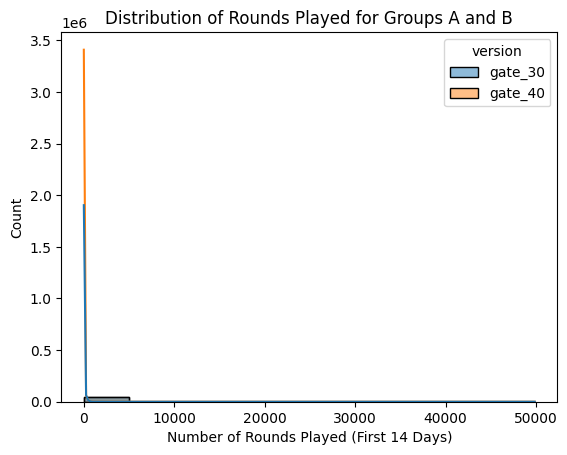

In [52]:
# Create a hist
sns.histplot(data=cats, x='sum_gamerounds', hue='version', bins=10, kde=True)
plt.xlabel('Number of Rounds Played (First 14 Days)')
plt.ylabel('Count')
plt.title('Distribution of Rounds Played for Groups A and B')
plt.show()

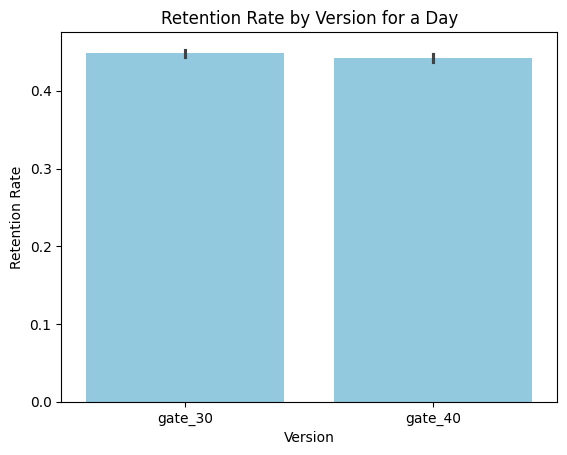

In [10]:
df = pd.DataFrame(cats)
# Calculate retention rates
retention_rates = df.groupby('version')['retention_1'].mean() * 100

# Create a bar plot
sns.barplot(x='version', y='retention_1', data=df, color='skyblue')
plt.xlabel('Version')
plt.ylabel('Retention Rate')
plt.title('Retention Rate by Version for a Day')
plt.show()

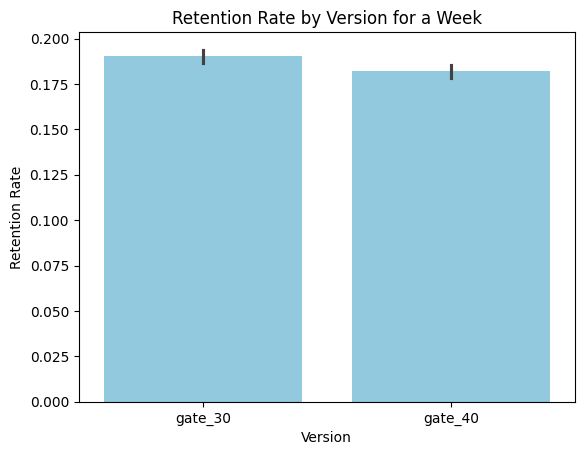

In [46]:
retention_rates = df.groupby('version')['retention_7'].mean() * 100

# Create a bar plot
sns.barplot(x='version', y='retention_7', data=df, color='skyblue')
plt.xlabel('Version')
plt.ylabel('Retention Rate')
plt.title('Retention Rate by Version for a Week')
plt.show()

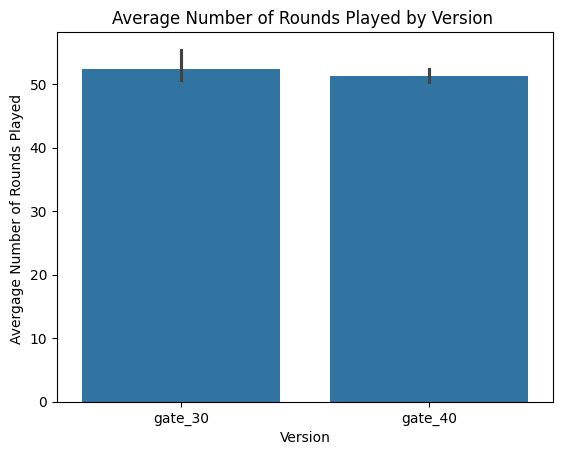

In [ ]:
sns.barplot( x = 'version',y = 'sum_gamerounds', data = df)
plt.xlabel('Version')
plt.ylabel('Avergage Number of Rounds Played ')
plt.title('Average Number of Rounds Played by Version ')
plt.show()

## **Hypothesis Testing**
H0: p1 = p2
Ha: p1 != p2
H0: uA - uB = 0
Ha: uA - UB != 0

Comparison of Average Rounds Played in the First 14 Days: Gate 30 vs. Gate 40

uA - uB = 0 Ha:
uA - UB != 0

In [19]:
# ttest
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import t
gate_30 = df.loc[df['version']== 'gate_30', 'sum_gamerounds']
gate_40 = df.loc[df['version']== 'gate_40', 'sum_gamerounds']

ttest_ind(gate_30, gate_40)

TtestResult(statistic=0.8910426211362967, pvalue=0.37290868247405207, df=90187.0)

In [23]:
x_Gate_30 = cats.groupby('version')['sum_gamerounds'].mean()['gate_30']
s_Gate_30 = cats.groupby('version')['sum_gamerounds'].std()['gate_30']
n_Gate_30 = cats.groupby('version')['sum_gamerounds'].count()['gate_30']

# Treatment group
x_Gate_40 = cats.groupby('version')['sum_gamerounds'].mean()['gate_40']
s_Gate_40 = cats.groupby('version')['sum_gamerounds'].std()['gate_40']
n_Gate_40 = cats.groupby('version')['sum_gamerounds'].count()['gate_40']


# Degree of freedom
nu = ((s_Gate_40**2/n_Gate_40 + s_Gate_30**2/n_Gate_30)**2) / ((s_Gate_40**4/(n_Gate_40**2*(n_Gate_40-1))) + (s_Gate_30**4/(n_Gate_30**2*(n_Gate_30-1))))

# Critical value
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, nu)

# Calculate the standard error of the difference
se_diff = np.sqrt(s_Gate_40**2/n_Gate_40 + s_Gate_30**2/n_Gate_30)

# Calculate the confidence interval
ci_low = (x_Gate_40 - x_Gate_30) - t_crit * se_diff
ci_high = (x_Gate_40 - x_Gate_30) + t_crit * se_diff
# Print the result
print(f"The 95% confidence interval for the difference in the average round play per user between the gate_30 and gate_40 is ({ci_low:.2f}, {ci_high:.2f}).")

The 95% confidence interval for the difference in the average round play per user between the gate_30 and gate_40 is (-3.72, 1.40).


Comparing the 1-day and 7-day retention rates for Gate 30 and Gate 40

In [44]:

import pandas as pd
from scipy.stats import chi2_contingency

# Count occurrences of True in retention_1 for gate_30 and gate_40
count_gate_30_1day_true = (df.loc[cats['version'] == 'gate_30', 'retention_1'] == True).sum()
count_gate_40_1day_true = (df.loc[cats['version'] == 'gate_40', 'retention_1'] == True).sum()

# Count occurrences of True in retention_7 for gate_30 and gate_40
count_gate_30_7day_true = (df.loc[cats['version'] == 'gate_30', 'retention_7'] == True).sum()
count_gate_40_7day_true = (df.loc[cats['version'] == 'gate_40', 'retention_7'] == True).sum()

# Create a DataFrame with version and retention columns
data = pd.DataFrame({
    'version': ['gate_30', 'gate_40'],
    'retention_1': [count_gate_30_1day_true, count_gate_40_1day_true],
    'retention_7': [count_gate_30_7day_true, count_gate_40_7day_true]
})

# Perform chi-squared test
contingency_table = data[['retention_1', 'retention_7']].values
chi2, p, _, _ = chi2_contingency(contingency_table)

if p < 0.05:
    print("There is a significant difference in retention rates.")
else:
    print("Retention rates are similar between versions.")


Retention rates are similar between versions.


Are the proportions of retained users significantly different between gate 30 and gate 40 at day 7?

H0: p1 = p2 Ha: p1 != p2

In [ ]:
retention_gate_30 = df.loc[df['version']== 'gate_30', 'retention_7'] # group A
retention_gate_40 = df.loc[df['version']== 'gate_40', 'retention_7'] # group B

In [ ]:
sum_retention_gate_30 = retention_gate_30[retention_gate_30 == True].sum()
sum_retention_gate_40 = retention_gate_40[retention_gate_40 == True].sum()
print(sum_retention_gate_30)
print(sum_retention_gate_40)

8502
8279


In [ ]:
# Proportion Ztest
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

count = np.array([8502, 8279])
nobs = np.array([retention_gate_30.shape[0], retention_gate_40.shape[0]])
stats, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

0.002


## **Insights**



- Gate_30 exhibits a higher average number of rounds played compared to Gate_40.
- Gate_40 users exhibit higher engagement in terms of the number of rounds played compared to Gate_30 users.
- Gate_30 Has a Higher Retention Rate for the First Installation Day Compared to Gate_40.
- Gate_30 Has a Higher Retention Rate for the Week After Installation Compared to Gate_40.





## **Technical Summary**

- We performed a two-proportion z-test to compare the proportions of Gate_30 and Gate_40. The p-value was 0.002, which is less than the significance level of 0.05. Therefore, we can confidently conclude that there is a significant difference between the proportions of Gate_30 and Gate_40.

- We conducted a two-sample mean test to compare the average number of rounds played between Gate_30 and Gate_40. The resulting p-value is 0.37, which exceeds the significance level of 0.05. Therefore, we cannot confidently conclude that there is a significant difference in the average number of rounds played between Gate_30 and Gate_40.
- The 95% confidence interval for the difference in the average round play per user between the gate_30 and gate_40 is (-3.72, 1.40).
- Retention rates are similar between versions.

- **Further Analysis**: We could conduct causal inference to better understand whether our observed effect is due to randomness or treatment, or alternatively, we could run the experiment for a longer period.
- Alternatively we could use a linear regression to predict our metrics to make informed decision.

## **Recommendation**  
-  Keep both gate_30 and gate_40 version
